# MNIST with Keras high-level language (Sequential model) - With vs without Convolutional Layers

Note: You may have to install a few libraries working in the background if you want to run this model by yourself. For running Keras on your Nvidia GPU follow the following instructions: [Link](https://github.com/antoniosehk/keras-tensorflow-windows-installation)

# Approach 1: Without convolutional layers

## Define dense layers

In [1]:
num_classes = 10 # ten handwritten digits (0 to 9) to classify

In [2]:
from keras.layers import Dense, Activation

Dense(units=num_classes, # number of output neurons
      activation = None, # activation function by name
      use_bias = True, # use bias term or not
      kernel_initializer = 'glorot_uniform',
      bias_initializer = 'zeros')

Using TensorFlow backend.
W0816 17:38:51.408221  1288 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



## Define dropout layers

In [3]:
from keras.layers import Dropout

rate = 0.2 # dropout rate 0 to 1

Dropout(rate,  # fraction of units to drop
       seed = None) # random seed for reproducibility

## Imports and loading data

In [4]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout, Dense

batch_size = 128
epochs = 20

(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data preprocessing

In [5]:
# 60000 samples (pictures), 28*28 features (pixels)
x_train = x_train.reshape(60000, 784) 
x_test = x_test.reshape(10000, 784)

# used to be integer greysacle, now needs to be float when converted 0 to 1
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32')

# normalize greyscale (0 to 255)) to values 0 to 1
x_train /= 255 
x_test /= 255

# create y labels (digits)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# check matrix sizes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('\nx_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 784)
y_train shape: (60000, 10)

x_test shape: (10000, 784)
y_test shape: (10000, 10)



## Defining and compiling the model

In [6]:
from keras.optimizers import SGD # Stochastic Gradient Descent
from keras.utils.vis_utils import plot_model
import pydot

# define model layers
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape=(784,))) # first layer only
model.add(Dropout(rate))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(rate))
model.add(Dense(num_classes, activation = 'softmax')) # output layer with 10 endpoints and softmax probability (0 to 1)

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True) # lr = learning rate , decay = earning rate decay over each update
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

# not so nice model representation
model.summary()

W0816 17:38:51.970582  1288 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 17:38:51.986203  1288 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 17:38:52.001825  1288 deprecation_wrapper.py:119] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 17:38:52.017455  1288 deprecation.py:506] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


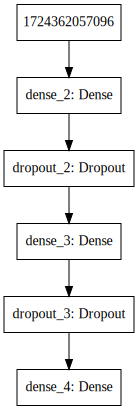

In [7]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# graphical representation of model layers saved to file. For some reason the show_shapes does not work.
plot_model(model, to_file='model_plot.png', show_shapes=True)

# show graph
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Running and evaluating

In [8]:
# Run model and save values in history variable
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Show final score
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

W0816 17:38:52.720405  1288 deprecation.py:323] From C:\Users\ChristianV700\Anaconda3\envs\keras-gpu\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.4860 - acc: 0.8598 - val_loss: 0.2165 - val_acc: 0.9375
Epoch 2/20
60000/60000 [==============================] - 2s 32us/step - loss: 0.2167 - acc: 0.9367 - val_loss: 0.1497 - val_acc: 0.9552
Epoch 3/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1604 - acc: 0.9524 - val_loss: 0.1182 - val_acc: 0.9634
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1313 - acc: 0.9617 - val_loss: 0.0993 - val_acc: 0.9689
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1090 - acc: 0.9677 - val_loss: 0.0895 - val_acc: 0.9715
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0947 - acc: 0.9717 - val_loss: 0.0831 - val_acc: 0.9742
Epoch 7/20
60000/60000 [==============================] - 2s 35us/step - loss: 0.0824 - acc: 0.9756 - val_loss: 0.0775 - val_acc

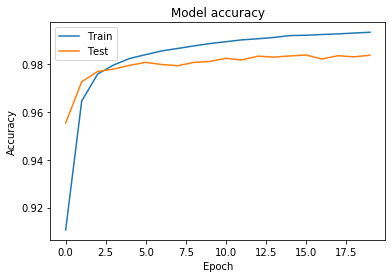

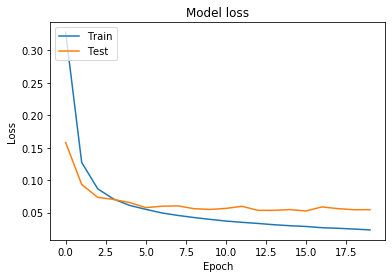

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values from history variable
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values from history variable
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Approach 2: With Convolutional layers

This design makes use of convolutional layers, which are particularly effective for image classification tasks.

## Imports and loading data

In [10]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D

batch_size = 128
num_classes = 10
epochs = 20

img_rows, img_cols = 28, 28

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## Data preprocessing

In [11]:
# matrix 60000 samples high and 784 features (pixel values) wide
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1) # for the TensorFlow backend, the color value comes last

# originally integer, needs to be float for next step
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize grey values
x_train /= 255
x_test /= 255

# check matrix sizes
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)

print('\nx_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

# convert class vectors to binary class matrices (labels)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)

x_test shape: (10000, 28, 28, 1)
y_test shape: (10000,)


## Defining and compiling the model

In [17]:
from keras.utils.vis_utils import plot_model
import pydot

# define model layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=input_shape, activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                589888    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
__________

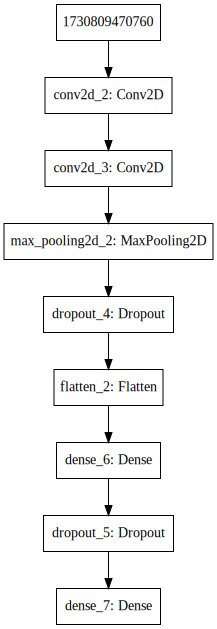

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# graphical representation of model layers saved to file. For some reason the show_shapes does not work.
plot_model(model, to_file='model_plot.png', show_shapes=True)

# show graph
SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Running and evaluating

In [19]:
# Run model and save values in history variable
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)

# Show final score
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 100us/step - loss: 0.3610 - acc: 0.8890 - val_loss: 0.0691 - val_acc: 0.9795
Epoch 2/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.1283 - acc: 0.9621 - val_loss: 0.0530 - val_acc: 0.9821
Epoch 3/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0966 - acc: 0.9719 - val_loss: 0.0422 - val_acc: 0.9873
Epoch 4/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0824 - acc: 0.9757 - val_loss: 0.0411 - val_acc: 0.9865
Epoch 5/20
60000/60000 [==============================] - 6s 93us/step - loss: 0.0718 - acc: 0.9791 - val_loss: 0.0351 - val_acc: 0.9885
Epoch 6/20
60000/60000 [==============================] - 6s 92us/step - loss: 0.0657 - acc: 0.9809 - val_loss: 0.0327 - val_acc: 0.9882
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0574 - acc: 0.9828 - val_loss: 0.0357 - val_ac

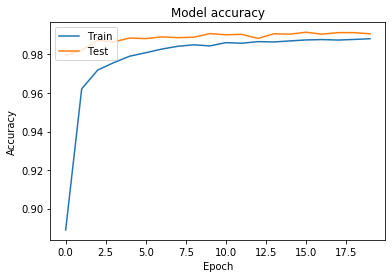

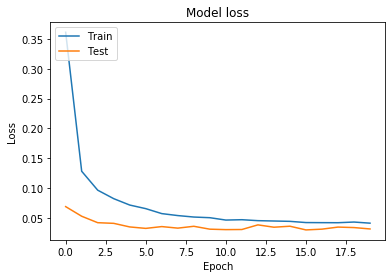

In [20]:
# Plot training & validation accuracy values from history variable
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values from history variable
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()